In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

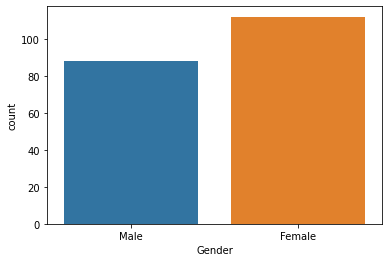

In [10]:
sns.countplot(df['Gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

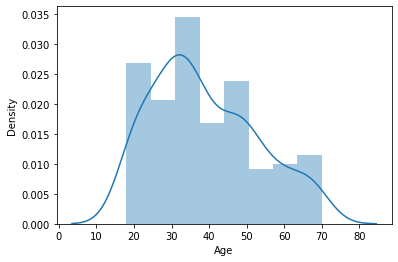

In [11]:
sns.distplot(df['Age'])

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [13]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [14]:
sse=[]
for i in range(1,30):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
sse

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21850.165282585633,
 19672.072849014323,
 17887.084456628643,
 15917.609689427862,
 14312.66860916861,
 12802.791660300481,
 11702.173889998889,
 11220.225086188322,
 9915.625216450217,
 9221.456954398258,
 8911.441346032136,
 8121.286613386613,
 7864.663086260145,
 7264.215538847118,
 6967.505766348562,
 6627.320845820846,
 6211.098549163256,
 6016.722442002442,
 5416.409150979739,
 5155.859994907054,
 4855.919787157288]

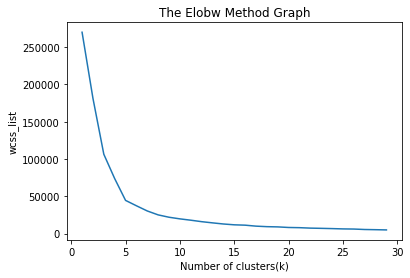

In [15]:
plt.plot(range(1,30),sse) 
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [16]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42)
df['cluster']=kmeans.fit_predict(X)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender,cluster
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,4
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,1,4
198,199,Male,32,137,18,1,1


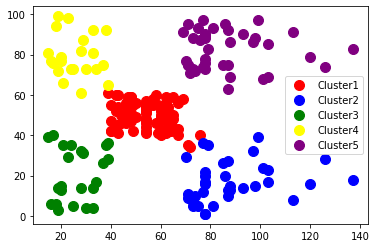

In [17]:
plt.scatter(df[df['cluster']==0]['Annual Income (k$)'],df[df['cluster']==0]['Spending Score (1-100)'],s=100,color="Red",label="Cluster1")
plt.scatter(df[df['cluster']==1]['Annual Income (k$)'],df[df['cluster']==1]['Spending Score (1-100)'],s=100,color="Blue",label="Cluster2")
plt.scatter(df[df['cluster']==2]['Annual Income (k$)'],df[df['cluster']==2]['Spending Score (1-100)'],s=100,color="Green",label="Cluster3")
plt.scatter(df[df['cluster']==3]['Annual Income (k$)'],df[df['cluster']==3]['Spending Score (1-100)'],s=100,color="Yellow",label="Cluster4")
plt.scatter(df[df['cluster']==4]['Annual Income (k$)'],df[df['cluster']==4]['Spending Score (1-100)'],s=100,color="Purple",label="Cluster5")
plt.legend()
plt.show()

# **Cluster 1 = Annual Income 40-60 Spend 40-60
# Cluster 2 = Annual Income 70-140 Spend 20-40
# Cluster 3 = Annual Income 20-40 Spend 20-40
# Cluster 4 = Annual Income 20-10 Spend 60-100
# Cluster 5 = Annual Income 70-140 spend 70-140**